In [4]:
import json
import pandas as pd
import numpy as np
import psycopg2
import yaml
import subprocess
# from gingerit.gingerit import GingerIt
# from fastpunct import FastPunct
import re
import difflib
# import enchant
# import language_tool_python
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def comm_sql(sql_query_location,token_location,warehouse_yaml_location):
# SQL query to get raw communication data
# inputs are address of wherever you have the SQL query, warehouse token, and warehouse YAML saved
# output is DataFrame of raw case data via SQL query

    # set up your database access token
    subprocess.run(['bash', token_location])

    # and your YAML file for accessing the database
    with open(warehouse_yaml_location) as file:
        creds = yaml.load(file, Loader=yaml.FullLoader)

    # set up connection to warehouse
    conn = psycopg2.connect(dbname='warehouse', user='Accelerator-Postgress-DB-Readonly@enrichmentenginedb',
                        host='enrichmentenginedb.postgres.database.azure.com', password=creds['password'],
                        sslmode='require')

    conn.autocommit = True

    # SQL query to get TTR data
    query = open(sql_query_location)
    data = pd.read_sql_query(query.read(), conn)

    return data

In [6]:
df = comm_sql('casesImport.sql',"../get_token.sh","../warehouse.yaml")
df.head()

[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "6f7e63f4-99ca-4eba-8260-e4dab58165f4",
    "id": "e9e053b1-a44b-404c-a88d-6fd567d8ef59",
    "isDefault": true,
    "managedByTenants": [
      {
        "tenantId": "b5a078fe-4334-4ee6-9122-352bf41674ec"
      },
      {
        "tenantId": "2f4a9838-26b7-47ee-be60-ccc1fdec5953"
      }
    ],
    "name": "Default Friendly Name",
    "state": "Enabled",
    "tenantId": "6f7e63f4-99ca-4eba-8260-e4dab58165f4",
    "user": {
      "name": "robert.allan@agio.com",
      "type": "user"
    }
  }
]


/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_13765/3265556188.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query.read(), conn)


,sys_id,short_description,u_case_category,u_case_subcategory,resolved_by,resolved_at_eastern,closed_by,resolution_code,u_agio_service,close_notes,u_html_description_clean,is_noise,is_generic_data,assignment_group_name,channel,user_sys_id,resolved_by_user_name
0,sn_customerservice_case/caa108e3870041149d70e5...,Akaris - new headsets,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 09:37:03,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,Closing case as it is no longer valid and olde...,"Hi guys, Our current Sennheiser headsets do ...",no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
1,sn_customerservice_case/dee30ca99727cd945adf7e...,Sims - new home desktop,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 10:28:49,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,Closed as client hasnt responded up and case i...,Hi! Sims home desktop is running slow. Can s...,no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
2,sn_customerservice_case/d6dc93901bba4d1872b011...,Laptop WiFi network adapter not working,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 10:49:10,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,Client has found another device,Response to a closed case #CS0171618: Hell...,no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
3,sn_customerservice_case/09ab5d96872505189d70e5...,Adobe - Outlook - Performance Issues,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 10:04:51,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,"Closing as it is invalid, case older than 6 mo...","Good morning, I need some help in setting up a...",no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
4,sn_customerservice_case/17c2ac658787b0109d70e5...,RE: Monitor,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-21 11:42:14,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,"Closing as invalid, case older than 6 months","Hey Rich, Adding @Support. Support please a...",no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com


In [7]:
from sentence_transformers import SentenceTransformer, util
import torch

/Users/robertallan/Documents/Code/Case_KnowledgeSemSearch/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df

,sys_id,short_description,u_case_category,u_case_subcategory,resolved_by,resolved_at_eastern,closed_by,resolution_code,u_agio_service,close_notes,u_html_description_clean,is_noise,is_generic_data,assignment_group_name,channel,user_sys_id,resolved_by_user_name
0,sn_customerservice_case/caa108e3870041149d70e5...,Akaris - new headsets,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 09:37:03,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,Closing case as it is no longer valid and olde...,"Hi guys, Our current Sennheiser headsets do ...",no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
1,sn_customerservice_case/dee30ca99727cd945adf7e...,Sims - new home desktop,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 10:28:49,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,Closed as client hasnt responded up and case i...,Hi! Sims home desktop is running slow. Can s...,no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
2,sn_customerservice_case/d6dc93901bba4d1872b011...,Laptop WiFi network adapter not working,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 10:49:10,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,Client has found another device,Response to a closed case #CS0171618: Hell...,no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
3,sn_customerservice_case/09ab5d96872505189d70e5...,Adobe - Outlook - Performance Issues,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-20 10:04:51,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,"Closing as it is invalid, case older than 6 mo...","Good morning, I need some help in setting up a...",no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
4,sn_customerservice_case/17c2ac658787b0109d70e5...,RE: Monitor,None,None,sys_user/0220f58987eeb810e18464250cbb350e,2022-07-21 11:42:14,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Customer,End User,"Closing as invalid, case older than 6 months","Hey Rich, Adding @Support. Support please a...",no,no,Agio - Procurement [AgioNow],Email,sys_user/0220f58987eeb810e18464250cbb350e,andrew.cunningham@agio.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137951,sn_customerservice_case/0517359897545d105adf7e...,LMD1137979 The host SERCEGOVIC_CISCO_ASA_5505 ...,None,None,sys_user/ff8176f61b6bc11072b011392a4bcbde,2022-06-21 03:51:11,sys_user/6816f79cc0a8016401c5a33be04be441,Resolved by Automation,Network,"Alert got cleared it may be ISP blip, Device l...",LMD1137979 The host SERCEGOVIC_CISCO_ASA_5505 ...,no,no,Agio - Evolution Network Support [AgioNow],System Generated,sys_user/ff8176f61b6bc11072b011392a4bcbde,jagadish.reddy@agio.com
137952,sn_customerservice_case/2131278987345d109d70e5...,Singapore Updates,None,None,sys_user/ff8176f61b6bc11072b011392a4bcbde,2022-07-19 22:56:12,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Support,Network,"Hi Chris,\n\nUpdated the hostname in both CLI ...","###NETENG### Team, Can you update the host...",no,no,Agio - Evolution Network Support [AgioNow],Email,sys_user/ff8176f61b6bc11072b011392a4bcbde,jagadish.reddy@agio.com
137953,sn_customerservice_case/61d0b12397e495585adf7e...,LMD137870859 - HPS - Alert - SYD-VM01 SSL Cert...,None,None,sys_user/ff8176f61b6bc11072b011392a4bcbde,2022-07-27 00:13:04,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Parent Incident,Server,"As per the mail communication from Chris, put ...",LMD137870859 - HPS - Alert - SYD-VM01 SSL Cert...,no,no,Agio - Evolution Network Support [AgioNow],System Generated,sys_user/ff8176f61b6bc11072b011392a4bcbde,jagadish.reddy@agio.com
137954,sn_customerservice_case/25e57f031bdc519072b011...,LMS310553986 - Agio - critical - Dr Sherman AT...,None,None,sys_user/f

In [9]:
df.channel.unique()
df.u_agio_service.unique()

array(['End User', 'Network', 'Field Services', 'Server', 'XDR', 'Cloud',
       'Database', 'Monitoring', 'Storage', 'Professional Services',
       'Onsite', 'Job Monitoring', ''], dtype=object)

In [10]:
df_endU = df[df.u_agio_service == 'End User']
df_endU= df_endU.sample(frac=1, random_state=0)
df_endU_test = df_endU[-5000:]
df_endU = df_endU[:-5000]
print(f'test_queries {df_endU_test.shape}')
print(f'main corpus {df_endU.shape}')

test_queries (5000, 17)
main corpus (45840, 17)


In [11]:
# df_testCLean.head()

In [12]:
# ### at https://www.sbert.net/docs/pretrained_models.html
# emailHeaderCleaningRegex = '(?i)(\s*-+\s+Forwarded message\s+-+\s+)?.{,10}?(From).{2,256}?((Date)|(Sent)){1}?.{2,256}?(Subject|To){1}?.{2,256}?(Subject|To){1}?:'
# df_endU['cleanedEmailHeadDesc'] = df_endU.u_html_description_clean.str.replace(emailHeaderCleaningRegex, '', regex=True,  flags=re.DOTALL)
embedder = SentenceTransformer('all-MiniLM-L6-v2')
# # df["corpus Title"] = df["Year"] + df["quarter"]
# # corpus = df_endU.u_html_description_clean.iloc[:5000].tolist()
# # corpus = df_endU.u_html_description_clean.tolist()
# #truncate to 200 char join short description
# df_endU['forEmbed'] = df_endU.cleanedEmailHeadDesc.str[:200]
# df_endU['forEmbed'] = df_endU[['short_description','forEmbed']].agg(' '.join, axis=1)
# # 5000 in 130 sec
# pool = embedder.start_multi_process_pool(['cpu', 'cpu', 'cpu','cpu'])
# corpus = df_endU['forEmbed'].tolist()
# corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
# # corpus_embeddings

# torch.save(corpus_embeddings, 'corpusEmbed.pt')
# embedder.stop_multi_process_pool(pool)
# # df_endU['embeddingTensors']

In [13]:
corpus_embed2 = torch.load('corpusEmbed.pt')
df_endU['embeddingTensors'] = corpus_embed2.tolist()

In [14]:
df_endU['embeddingTensors']

108147    [-0.06335294246673584, 0.014067443087697029, 0...
133173    [0.017421841621398926, -0.0598796084523201, 0....
43123     [-0.10772398114204407, -0.02618468552827835, 0...
132196    [0.02698688395321369, -0.07736654579639435, 0....
85346     [-0.06866711378097534, 0.05440842732787132, -0...
                                ...                        
88360     [0.01196025125682354, 0.051582109183073044, 0....
89136     [0.0507635734975338, -0.0028030381072312593, 0...
69894     [0.020505394786596298, 0.008324804715812206, 0...
108878    [-0.038147781044244766, -0.05323449894785881, ...
132473    [-0.059830356389284134, 0.07002709805965424, 0...
Name: embeddingTensors, Length: 45840, dtype: object

In [15]:
finalCount = df_endU_test.shape[0]
for i in range(1,4):
    df_endU_test[f"matchText_{i}"] = ""
    df_endU_test[f"simScore_{i}"] = -999
# corpus_embeddings = df_endU['embeddingTensors']
corpus_embeddings =corpus_embed2
# df_endU_test.columns
count= 0
emailHeaderCleaningRegex = '(?i)(\s*-+\s+Forwarded message\s+-+\s+)?.{,10}?(From).{2,256}?((Date)|(Sent)){1}?.{2,256}?(Subject|To){1}?.{2,256}?(Subject|To){1}?:'
df_endU_test['cleanedEmailHeadDesc'] = df_endU_test.u_html_description_clean.str.replace(emailHeaderCleaningRegex, '', regex=True,  flags=re.DOTALL)


df_endU_test['forEmbed'] = df_endU_test.cleanedEmailHeadDesc.str[:200]
df_endU_test['forEmbed'] = df_endU_test[['short_description','forEmbed']].agg(' '.join, axis=1)

In [17]:
row

7426      sn_customerservice_case/eb60a50087be1110e18464...
88658     sn_customerservice_case/2690adab1be390903887a6...
50287     sn_customerservice_case/1962ee28db543c108ce0a7...
1424      sn_customerservice_case/c466171c1b13115472b011...
27286     sn_customerservice_case/3c021e19879730109d70e5...
                                ...                        
60375     sn_customerservice_case/ab43bf5287cad110e18464...
126758    sn_customerservice_case/914207ce1b26455472b011...
113727    sn_customerservice_case/71588ea89740d9185adf7e...
114728    sn_customerservice_case/c3e3ccdd1b057450813deb...
8996      sn_customerservice_case/4f5c52c587bc49149d70e5...
Name: sys_id, Length: 5000, dtype: object

In [19]:
row = df_endU_test.iloc[0,:]

In [20]:
%%time

# count+=1
# print(f'{count/finalCount*100} %')
query = row.forEmbed
query_embedding = embedder.encode(query, convert_to_tensor=True)
# print(index)
# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=3)

CPU times: user 56.7 ms, sys: 11.4 ms, total: 68.2 ms
Wall time: 44.7 ms


In [15]:

for index, row in df_endU_test.iterrows():
    count+=1
    print(f'{count/finalCount*100} %')
    query = row.forEmbed
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    # print(index)
    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=3)

    # print("\n\n======================\n\n")
    # print("Query:", query)
    # print("\nTop 5 most similar sentences in corpus:")
    i=1
    for score, idx in zip(top_results[0], top_results[1]):
        df_endU_test[f"matchText_{i}"][index] = df_endU.u_html_description_clean.iloc[idx.tolist()]
        df_endU_test[f"simScore_{i}"][index] = score.item()
        # print(corpus[idx], "(Score: {:.4f})".format(score))
        i+=1

    # """
    # # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    # hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    # hits = hits[0]      #Get the hits for the first query
    # for hit in hits:
    #     print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    # """

0.04 %
0.06 %


/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_79992/3148722074.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endU_test[f"matchText_{i}"][index] = df_endU.u_html_description_clean.iloc[idx.tolist()]
/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_79992/3148722074.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endU_test[f"simScore_{i}"][index] = score.item()


0.08 %
0.1 %
0.12 %
0.13999999999999999 %
0.16 %
0.18 %
0.2 %
0.22 %
0.24 %
0.26 %
0.27999999999999997 %
0.3 %
0.32 %
0.33999999999999997 %
0.36 %
0.38 %
0.4 %
0.42 %
0.44 %
0.45999999999999996 %
0.48 %
0.5 %
0.52 %
0.54 %
0.5599999999999999 %
0.58 %
0.6 %
0.62 %
0.64 %
0.66 %
0.6799999999999999 %
0.7000000000000001 %
0.72 %
0.74 %
0.76 %
0.7799999999999999 %
0.8 %
0.8200000000000001 %
0.84 %
0.86 %
0.88 %
0.8999999999999999 %
0.9199999999999999 %
0.9400000000000001 %
0.96 %
0.98 %
1.0 %
1.02 %
1.04 %
1.06 %
1.08 %
1.0999999999999999 %
1.1199999999999999 %
1.1400000000000001 %
1.16 %
1.18 %
1.2 %
1.22 %
1.24 %
1.26 %
1.28 %
1.3 %
1.32 %
1.34 %
1.3599999999999999 %
1.38 %
1.4000000000000001 %
1.4200000000000002 %
1.44 %
1.46 %
1.48 %
1.5 %
1.52 %
1.54 %
1.5599999999999998 %
1.58 %
1.6 %
1.6199999999999999 %
1.6400000000000001 %
1.66 %
1.68 %
1.7000000000000002 %
1.72 %
1.7399999999999998 %
1.76 %
1.78 %
1.7999999999999998 %
1.82 %
1.8399999999999999 %
1.8599999999999999 %
1.880000000000

In [16]:
df_endU_test['u_html_description_clean'] = df_endU_test.u_html_description_clean.str.replace(r'=', '', regex=True)
df_endU_test['cleanedEmailHeadDesc'] = df_endU_test.cleanedEmailHeadDesc.str.replace(r'=', '', regex=True)
for i in range(1,4):
    df_endU_test[f"matchText_{i}"] = df_endU_test[f"matchText_{i}"].str.replace(r'=', '', regex=True)
    # df_endU_test[f"simScore_{i}"] = -999
df_endU_test.sort_values(by='simScore_1',inplace=True,ascending=False)
df_endU_test.to_excel("testMatchesEU.xlsx")

In [17]:
# queries = [df_endU.u_html_description_clean.iloc[5550], df_endU.u_html_description_clean.iloc[7600], df_endU.u_html_description_clean.iloc[8000]]
# queries = [ line[:200] for line in queries]
# queries

In [18]:


# for query in queries[0:2]:
#     query_embedding = embedder.encode(query, convert_to_tensor=True)

#     # We use cosine-similarity and torch.topk to find the highest 5 scores
#     cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
#     top_results = torch.topk(cos_scores, k=3)

#     print("\n\n======================\n\n")
#     print("Query:", query)
#     print("\nTop 5 most similar sentences in corpus:")

#     for score, idx in zip(top_results[0], top_results[1]):
#         print(corpus[idx], "(Score: {:.4f})".format(score))

#     """
#     # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
#     hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
#     hits = hits[0]      #Get the hits for the first query
#     for hit in hits:
#         print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
#     """

In [19]:
# for query in queries[2:]:
#     query_embedding = embedder.encode(query, convert_to_tensor=True)

#     # We use cosine-similarity and torch.topk to find the highest 5 scores
#     cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
#     top_results = torch.topk(cos_scores, k=3)

#     print("\n\n======================\n\n")
#     print("Query:", query)
#     print("\nTop 5 most similar sentences in corpus:")

#     for score, idx in zip(top_results[0], top_results[1]):
#         print(corpus[idx], "(Score: {:.4f})".format(score))

#     """
#     # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
#     hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
#     hits = hits[0]      #Get the hits for the first query
#     for hit in hits:
#         print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
#     """

## attempting to link knowledge base

In [20]:
df_know_journ = comm_sql('journalKnowledgeImport.sql',"../get_token.sh","../warehouse.yaml")
df_know_journ.head()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "6f7e63f4-99ca-4eba-8260-e4dab58165f4",
    "id": "e9e053b1-a44b-404c-a88d-6fd567d8ef59",
    "isDefault": true,
    "managedByTenants": [
      {
        "tenantId": "b5a078fe-4334-4ee6-9122-352bf41674ec"
      },
      {
        "tenantId": "2f4a9838-26b7-47ee-be60-ccc1fdec5953"
      }
    ],
    "name": "Default Friendly Name",
    "state": "Enabled",
    "tenantId": "6f7e63f4-99ca-4eba-8260-e4dab58165f4",
    "user": {
      "name": "robert.allan@agio.com",
      "type": "user"
    }
  }
]


/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_79992/3265556188.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query.read(), conn)


,sys_id,table_name,element_id,element,associated_sys_id,journal_value,sys_tags,sys_created_on,sys_created_by,load_datetime
0,sys_journal_field/e8b30e748727f010e18464250cbb...,sn_customerservice_case,ac1775b4872330109d70e58e0ebb351c,work_notes,sn_customerservice_case/ac1775b4872330109d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-10-29 16:42:31+00:00,Dustin.Silsby@agio.com,2021-10-30 03:10:31.989344+00:00
1,sys_journal_field/0ab521bd87a370109d70e58e0ebb...,sn_customerservice_case,e8bcd97d87eb30109d70e58e0ebb35e5,work_notes,sn_customerservice_case/e8bcd97d87eb30109d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-11-01 17:05:27+00:00,shrikrishna.hennala@agio.com,2021-11-02 03:11:42.979777+00:00
2,sys_journal_field/26e53531872f70109d70e58e0ebb...,sn_customerservice_case,0416ddfc8723b010e18464250cbb3568,work_notes,sn_customerservice_case/0416ddfc8723b010e18464...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-11-01 18:16:13+00:00,shivangi.patel@agio.com,2021-11-02 03:11:42.979777+00:00
3,sys_journal_field/0f2bcefd87e7b0109d70e58e0ebb...,sn_customerservice_case,6f433d7987ab70109d70e58e0ebb35a7,work_notes,sn_customerservice_case/6f433d7987ab70109d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-11-01 19:49:06+00:00,Maciej.Sabodacha@agio.com,2021-11-02 03:11:42.979777+00:00
4,sys_journal_field/170ffc7587eff010e18464250cbb...,sn_customerservice_case,766910f987a7f0109d70e58e0ebb3537,work_notes,sn_customerservice_case/766910f987a7f0109d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-11-01 14:16:31+00:00,marcus.sanders@agio.com,2021-11-02 03:11:42.979777+00:00


In [21]:
df_know_journ = df_know_journ.sort_values(by="sys_created_on",ascending=False)

In [22]:
hyper_pattern = "(?:<a href='/kb_knowledge\.do\?sys_id=)([a-f0-9]{4,40})'>(KB\d{6,8})</a>"
hyperLinkList = []
KBNums = []
for idx, row in df_know_journ.iterrows():
    HyperLink = re.search(hyper_pattern,row.journal_value,flags=re.IGNORECASE)
    final_HL = "https://agionow.service-now.com/nav_to.do?uri=%2Fkb_view.do%3Fsys_kb_id%3D"+HyperLink [1]
    hyperLinkList.append(final_HL )
    KBNums.append(HyperLink [2])
df_know_journ['Knowledge_HyperL'] = hyperLinkList
df_know_journ['KB_number'] = KBNums

In [23]:
df_know_journ.head()

,sys_id,table_name,element_id,element,associated_sys_id,journal_value,sys_tags,sys_created_on,sys_created_by,load_datetime,Knowledge_HyperL,KB_number
762,sys_journal_field/bff3f72e979b19505adf7e300153...,sn_customerservice_case,09338d7f1b87911472b011392a4bcbca,work_notes,sn_customerservice_case/09338d7f1b87911472b011...,Knowledge Article [code]<a href='/kb_knowledge...,,2022-11-24 17:29:08+00:00,abdelatif.tiazit@agio.com,2022-11-25 03:52:51.091197+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0021082
764,sys_journal_field/2b328622979f95505adf7e300153...,sn_customerservice_case,da9e261e9713d1505adf7e300153aff5,work_notes,sn_customerservice_case/da9e261e9713d1505adf7e...,Knowledge Article [code]<a href='/kb_knowledge...,,2022-11-24 09:12:08+00:00,sagar.patel@agio.com,2022-11-25 03:52:51.091197+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0018024
757,sys_journal_field/77efa352979b15505adf7e300153...,sn_customerservice_case,513b79b71b8fd11472b011392a4bcb7b,work_notes,sn_customerservice_case/513b79b71b8fd11472b011...,Knowledge Article [code]<a href='/kb_knowledge...,,2022-11-23 22:32:55+00:00,john.malzone@agio.com,2022-11-24 03:58:00.696401+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0021079
761,sys_journal_field/beefefd21b17d55072b011392a4b...,sn_customerservice_case,a05c26e387a915949d70e58e0ebb350b,work_notes,sn_customerservice_case/a05c26e387a915949d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2022-11-23 22:32:50+00:00,Maciej.Sabodacha@agio.com,2022-11-24 03:58:00.696401+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0020530
759,sys_journal_field/7adea3121b17d55072b011392a4b...,sn_customerservice_case,df92dcea1b43599072b011392a4bcbde,work_notes,sn_customerservice_case/df92dcea1b43599072b011...,Knowledge Article [code]<a href='/kb_knowledge...,,2022-11-23 22:28:12+00:00,Maciej.Sabodacha@agio.com,2022-11-24 03:58:00.696401+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0020980


In [24]:
df_endU.sys_id

108147    sn_customerservice_case/2ca3e129db91b050fdb664...
133173    sn_customerservice_case/87f9273e1b107410813deb...
43123     sn_customerservice_case/ab0b754387b005d49d70e5...
132196    sn_customerservice_case/ec3197d5dbb430108ce0a7...
85346     sn_customerservice_case/d19847ec1b5cf410813deb...
                                ...                        
88360     sn_customerservice_case/43fef49a87da9d14e18464...
89136     sn_customerservice_case/b626199e8755dd509d70e5...
69894     sn_customerservice_case/84437a0e1b887410813deb...
108878    sn_customerservice_case/439e5833dbdd3410fdb664...
132473    sn_customerservice_case/10cfb59b1b51609088d4b8...
Name: sys_id, Length: 45840, dtype: object

In [26]:
###Join to corpus
print(df_endU.shape)
df_endU_onlyKB = df_endU.merge(right = df_know_journ, how="inner",left_on="sys_id" , right_on='associated_sys_id')
print(df_endU_onlyKB.shape)
df_endU_onlyKB.head()

(45840, 18)
(3627, 30)


,sys_id_x,short_description,u_case_category,u_case_subcategory,resolved_by,resolved_at_eastern,closed_by,resolution_code,u_agio_service,close_notes,...,element_id,element,associated_sys_id,journal_value,sys_tags,sys_created_on,sys_created_by,load_datetime,Knowledge_HyperL,KB_number
0,sn_customerservice_case/06f06d5e875330109d70e5...,"FW: ​​​​​​​VN sent to sgonzalez on October 21,...",None,None,sys_user/e33605a61bc5d810bc9eebd22a4bcba6,2021-10-22 16:43:15,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Support,End User,Per your request for assistance with phishing ...,...,06f06d5e875330109d70e58e0ebb3508,work_notes,sn_customerservice_case/06f06d5e875330109d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-10-21 20:33:19+00:00,shivangi.patel@agio.com,2021-10-22 03:11:45.824837+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0019198
1,sn_customerservice_case/bf72fcf2879670109d70e5...,StoneHawk Daily File Transfer,issue_availability,av_config,sys_user/c05ad7cc1b795810bc9eebd22a4bcb12,2021-09-06 17:07:44,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Support,End User,Glad to hear it Cindy..My pleasure. Have a wo...,...,bf72fcf2879670109d70e58e0ebb3547,work_notes,sn_customerservice_case/bf72fcf2879670109d70e5...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-09-06 21:08:59+00:00,crystal@agio.com,2021-09-07 03:07:50.563460+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0019260
2,sn_customerservice_case/d045ef771b2f549088d4b8...,Outlook on phone updated but user is not able ...,issue_login,log_other,sys_user/9653a5001b829050bc9eebd22a4bcb18,2020-10-06 12:21:12,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Support,End User,"Good morning Sara,\n\nPer our conversation I w...",...,d045ef771b2f549088d4b8c2cc4bcbfd,work_notes,sn_customerservice_case/d045ef771b2f549088d4b8...,Knowledge Article [code]<a href='/kb_knowledge...,,2020-10-06 15:15:06+00:00,shivangi.patel@agio.com,2021-07-29 15:36:02.337165+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0015833
3,sn_customerservice_case/8193f4ef1ba624103887a6...,Cylance,issue_availability,av_cloud,sys_user/7173e1c8db8ed050fd30a7a8139619f6,2021-03-04 06:28:02,sys_user/6816f79cc0a8016401c5a33be04be441,Solved by Support,End User,Removed and reinstalled Cylance through Labtec...,...,8193f4ef1ba624103887a6442a4bcbb0,work_notes,sn_customerservice_case/8193f4ef1ba624103887a6...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-03-03 11:27:06+00:00,kendall.williams@agio.com,2021-07-29 15:36:30.090551+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0018852
4,sn_customerservice_case/47c3b1a21bc2641088d4b8...,SPAM,issue_availability,av_other,sys_user/c05ad7cc1b795810bc9eebd22a4bcb12,2021-02-08 07:57:19,sys_user/6816f79cc0a8016401c5a33be04be441,Not Solved - No Response,End User,"Regarding CS0052782, we haven't heard from you...",...,47c3b1a21bc2641088d4b8c2cc4bcbf8,work_notes,sn_customerservice_case/47c3b1a21bc2641088d4b8...,Knowledge Article [code]<a href='/kb_knowledge...,,2021-02-03 19:20:34+00:00,crystal@agio.com,2021-07-29 15:36:34.369572+00:00,https://agionow.service-now.com/nav_to.do?uri=...,KB0017774


In [36]:
df_endU_onlyKB.columns

Index(['sys_id_x', 'short_description', 'u_case_category',
       'u_case_subcategory', 'resolved_by', 'resolved_at_eastern', 'closed_by',
       'resolution_code', 'u_agio_service', 'close_notes',
       'u_html_description_clean', 'is_noise', 'is_generic_data',
       'assignment_group_name', 'channel', 'user_sys_id',
       'resolved_by_user_name', 'embeddingTensors', 'sys_id_y', 'table_name',
       'element_id', 'element', 'associated_sys_id', 'journal_value',
       'sys_tags', 'sys_created_on', 'sys_created_by', 'load_datetime',
       'Knowledge_HyperL', 'KB_number'],
      dtype='object')

In [ ]:
df_endU_onlyKB.embeddingTensors

In [35]:
corpus_embeddings_onlyKB = torch.tensor(df_endU_onlyKB.embeddingTensors.to_list())

In [39]:
df_endU_test_KB = df_endU_test.copy()
count = 0
for i in range(1,4):
    df_endU_test_KB[f"matchText_{i}"] = ""
    df_endU_test_KB[f"matchKnowledge_HyperL_{i}"] = ""
    df_endU_test_KB[f"simScore_{i}"] = -999
for index, row in df_endU_test.iterrows():
    count+=1
    print(f'{count/finalCount*100} %')
    query = row.forEmbed
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    # print(index)
    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings_onlyKB)[0]
    top_results = torch.topk(cos_scores, k=3)

    # print("\n\n======================\n\n")
    # print("Query:", query)
    # print("\nTop 5 most similar sentences in corpus:")
    i=1
    for score, idx in zip(top_results[0], top_results[1]):
        df_endU_test_KB[f"matchText_{i}"][index] = df_endU_onlyKB.u_html_description_clean.iloc[idx.tolist()]
        df_endU_test_KB[f"matchKnowledge_HyperL_{i}"][index] = df_endU_onlyKB.Knowledge_HyperL.iloc[idx.tolist()]
        df_endU_test_KB[f"simScore_{i}"][index] = score.item()
        # print(corpus[idx], "(Score: {:.4f})".format(score))
        i+=1


100.07999999999998 %
100.1 %
100.12 %
100.14 %
100.16000000000001 %


/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_79992/1173656841.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endU_test_KB[f"matchText_{i}"][index] = df_endU_onlyKB.u_html_description_clean.iloc[idx.tolist()]
/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_79992/1173656841.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endU_test_KB[f"matchKnowledge_HyperL_{i}"][index] = df_endU_onlyKB.Knowledge_HyperL.iloc[idx.tolist()]
/var/folders/j1/7rjng7m931sccc3b4z02rhtm0000gq/T/ipykernel_79992/1173656841.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

100.18 %
100.2 %
100.22 %
100.24 %
100.25999999999999 %
100.27999999999999 %
100.29999999999998 %
100.32000000000001 %
100.34 %
100.36 %
100.38 %
100.4 %
100.42 %
100.44 %
100.46 %
100.47999999999999 %
100.49999999999999 %
100.52000000000001 %
100.54 %
100.56 %
100.58 %
100.6 %
100.62 %
100.64 %
100.66 %
100.67999999999999 %
100.69999999999999 %
100.72000000000001 %
100.74000000000001 %
100.76 %
100.78 %
100.8 %
100.82 %
100.84 %
100.86 %
100.88 %
100.89999999999999 %
100.92000000000002 %
100.94000000000001 %
100.96000000000001 %
100.98 %
101.0 %
101.02 %
101.03999999999999 %
101.05999999999999 %
101.08 %
101.1 %
101.12 %
101.14000000000001 %
101.16000000000001 %
101.18 %
101.2 %
101.22 %
101.24 %
101.25999999999999 %
101.27999999999999 %
101.29999999999998 %
101.32000000000001 %
101.34 %
101.36 %
101.38000000000001 %
101.4 %
101.42 %
101.44 %
101.46 %
101.47999999999999 %
101.49999999999999 %
101.52000000000001 %
101.54 %
101.56 %
101.58 %
101.6 %
101.62 %
101.64 %
101.66 %
101.679999

In [40]:
# df_endU_test['u_html_description_clean'] = df_endU_test.u_html_description_clean.str.replace(r'=', '', regex=True)
# df_endU_test['cleanedEmailHeadDesc'] = df_endU_test.cleanedEmailHeadDesc.str.replace(r'=', '', regex=True)

for i in range(1,4):
    df_endU_test_KB[f"matchText_{i}"] = df_endU_test_KB[f"matchText_{i}"].str.replace(r'=', '', regex=True)
    # df_endU_test[f"simScore_{i}"] = -999
df_endU_test_KB.sort_values(by='simScore_1',inplace=True,ascending=False)
df_endU_test_KB.to_excel("testMatchesEU_KBOnly.xlsx")

<AxesSubplot: xlabel='simScore_1', ylabel='Proportion'>

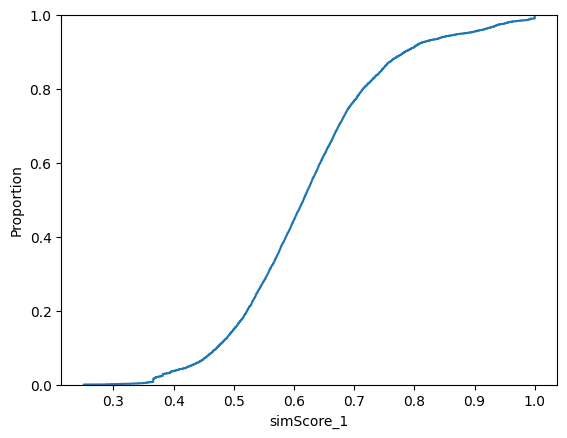

In [42]:
sns.ecdfplot(data=df_endU_test_KB, x="simScore_1")